Read in image

Get boundaries of image with bounding box

Crop image

Feed to edge detection

Feed to classification

In [20]:
import sys, os

from PIL import Image

import matplotlib.pyplot as plt
from   matplotlib.patches import Rectangle

import generate_image_labels as giLabels

In [3]:
sys.path.append("/home/sean/Insight/legos/tensorbox")

import pred_location as pl

In [11]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14,10)

%matplotlib inline

In [15]:
my_df = giLabels.gen_dirty_labels()

In [16]:
my_df.head()

,img_path,label,height_brick,height_plate,height_other,shape_corner,shape_round,shape_square,short_1,short_2,...,short_6,short_8,long_1,long_2,long_3,long_4,long_6,long_8,long_10,long_12
0,/home/sean/Desktop/lego_images_bounding_box_di...,brick_corner_1x2x2,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,/home/sean/Desktop/lego_images_bounding_box_di...,brick_corner_1x2x2,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,/home/sean/Desktop/lego_images_bounding_box_di...,brick_corner_1x2x2,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,/home/sean/Desktop/lego_images_bounding_box_di...,brick_corner_1x2x2,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,/home/sean/Desktop/lego_images_bounding_box_di...,brick_corner_1x2x2,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


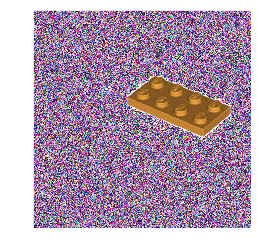

In [83]:
i = 53
file_name = my_df.loc[i,'img_path']
img = Image.open( file_name )
plt.imshow( img )
plt.show()

In [99]:
def get_img_bbox(
                    file_name    ,
                    inp_img      ,
                    box_scale=1.0,
                ):
    
    rect_list = pl.pred_lego_locations( file_name )
    
    inp_size_x = inp_img.size[0]
    inp_size_y = inp_img.size[1]
    
    fixed_rect_dict_list = []
    
    # May return multiple
    for rect in rect_list:
                
        x_mod = inp_size_x / 640.
        y_mod = inp_size_y / 480.

        # Need to expand box since fit to 640x480 image
        # Also expand borders of box 
        x_1 =  rect['x1'] * x_mod
        x_2 =  rect['x2'] * x_mod
        y_1 =  rect['y1'] * y_mod
        y_2 =  rect['y2'] * y_mod

        width = x_2 - x_1
        height= y_2 - y_1

        # Expand to the box to really make sure we have the lego
        # But make sure we don't go out of the box
        x_1 = max( x_1 + width / 2 * ( 1 - box_scale ),             0 )
        x_2 = min( x_2 - width / 2 * ( 1 - box_scale ), img.size[0]-1 )
        y_1 = max( y_1 + width / 2 * ( 1 - box_scale ),             0 ) 
        y_2 = min( y_2 - width / 2 * ( 1 - box_scale ), img.size[1]-1 )

        # Repopulate dictionary
        fixed_rect_dict_list.append(
                                    {
                                        'x1':int(x_1),
                                        'x2':int(x_2),
                                        'y1':int(y_1),
                                        'y2':int(y_2),
                                    }
                                   )
    return fixed_rect_dict_list


def plot_img_bbox(
                    inp_file,
                    bb_scale=1.0,
                 ):
    img = Image.open( inp_file )
    fig, ax = plt.subplots()
    ax.imshow( img )
    rect_list = get_img_bbox( file_name, img, box_scale=bb_scale )
    for rect in rect_list:
        x_1 = rect['x1']
        x_2 = rect['x2']
        y_1 = rect['y1']
        y_2 = rect['y2']
        width = x_2 - x_1
        height= y_2 - y_1
        ax.add_patch(Rectangle( 
                        (int(x_1),int(y_1)), 
                        int(width), 
                        int(height), fill=False, color='r' ) )
    plt.show()

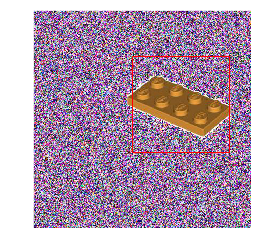

In [100]:
plot_img_bbox( file_name )